## 6.1 차원 축소의 개요

6장에선 대표적인 차원 축소 알고리즘인 PCA, LDA, SVD, NMF를 배울 것임.
* 차원 축소: 매우 많은 feature로 구성된 다차원 data set의 차원을 축소해 새로운 차원의 data set을 생성하는 것.
* 차원 ↑ ⇒ data point 간의 거리 ↑ = sparse한 구조. 이러면 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐. 
* feature가 많을 경우 개별 feature 간에 상관관계가 높을 가능성 ↑ ⇒ 다중 공선성 문제로 모델의 예측 성능 저하.
* 그래서 축소를 해주는 거고 축소해주면 데이터를 좀 더 직관적으로 해석할 수도 있고 학습에 필요한 처리 능력도 줄일 수 있음!

**차원 축소**
* **feature selection**: 특정 feature에 종속성이 강한 불필요한 feature는 제거하고 데이터의 특징을 잘 나타내는 주요 feature만 선택
* **feature extraction**: 기존 feature를 저차원의 중요 feature로 압축해서 추출. 이 경우 기존의 feature와는 완전히 다른 값이 됨. 단순 압축보단 feature를 함축적으로 잘 설명할 수 있는 공간으로 매핑해 추출하는 것임. 즉, 단순히 데이터를 압축하는 것이 아닌 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 것.
* 이미지에 차원 축소를 적용해주면 과적합 영향력이 작아져서 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어 올릴 수 있음
* 텍스트에 적용시 숨겨진 의미(Semantic, Topic)를 추출할 수 있음. SVD와 NMF가 이런 모델을 위한 알고리즘으로 쓰임.  

## 6.2 PCA(Principal Component Analysis)

### PCA 개요 

* 대표적인 차원 축소 기법
* 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal component)을 추출해 차원을 축소
* 가장 높은 분산을 가지는 데이터의 축으로 차원을 축소함. 이 축이 주성분.
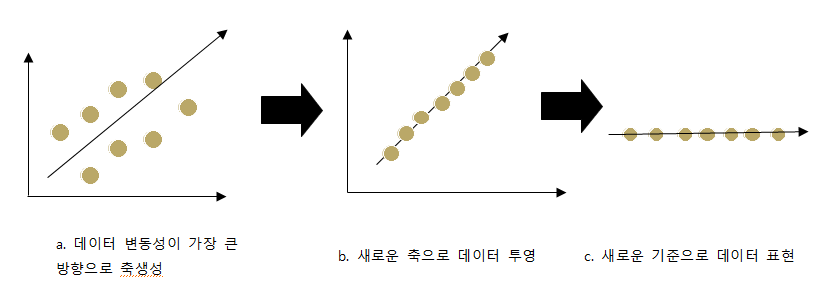

1. 가장 큰 데이터 변동성(Variance)을 기반으로 축 생성
2. 1번 축의 직교벡터를 축으로
3. 2번 축의 직교벡터를 축으로...

이러면 축 개수만큼의 차원으로 축소됨.

선형대수 관점에서 해석해보자

input data의 Covariance matrix를 eigenvalue decomposition하고, 이렇게 구한 eigenvector에 input data를 linear transformation 해주는 것. 이 eigenvector가 PCA의 주성분 벡터로서 input data의 분산이 큰 방향을 나타냄. eigenvalue는 이 eigenvector의 크기이자 input data의 분산을 나타냄.

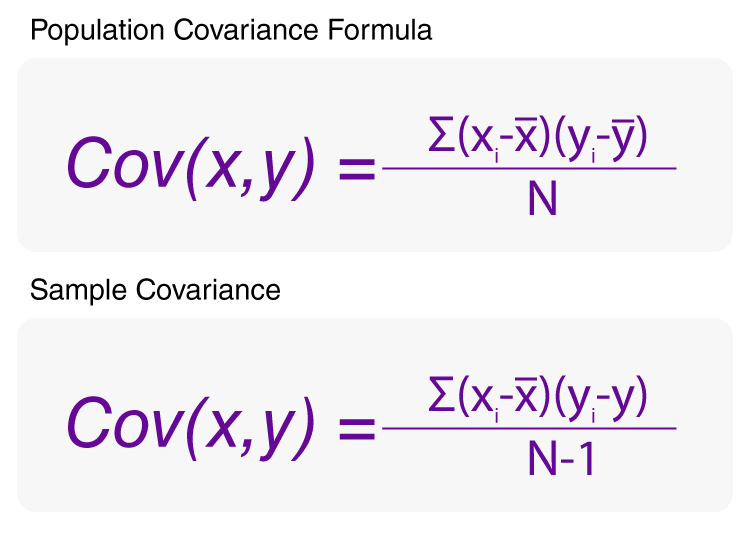


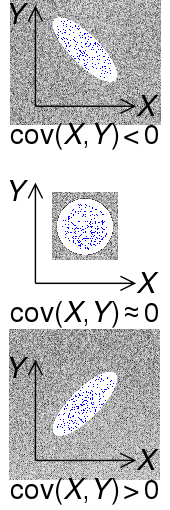

* 공분산 행렬은 Square & Symmetric matrix
* symmetric하면 eigenvector를 orthogonal matrix로, eigenvalue를 square matrix로 대각화할 수 있음.

$$C=P∑P^T$$
<center>where $C$: Covariance matrix, $P$: nxn Orthogonal matrix, $Σ$: nxn square matrix

 ⇓ </center>

$$C=[e_1 … e_n]\begin{bmatrix}λ&…&0\\…&…&…\\0&…&λ_n \end{bmatrix}\begin{bmatrix}{e_1}^t\\…\\{e_n}^t\end{bmatrix}$$

순서 정리
1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)의 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환.

iris 데이터의 4개 속성(sepal/petal * length/width)을 2개의 PCA 차원으로 압축해보자.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


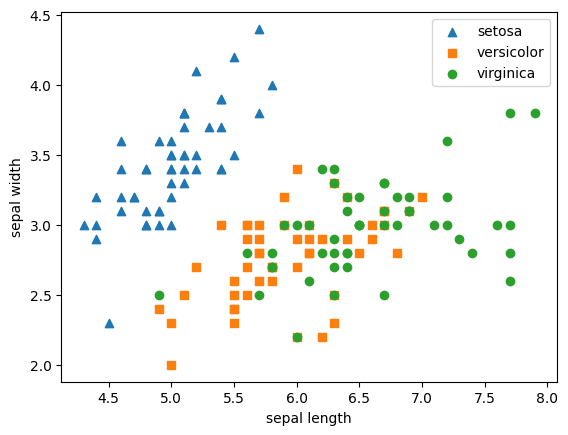

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

이것이 원본 데이터셋의 2차원 분포.

이제 PCA로 4개 속성을 2개로 압축해보겠음. 그러기 전에 개별 속성을 스케일링해줘야 함.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


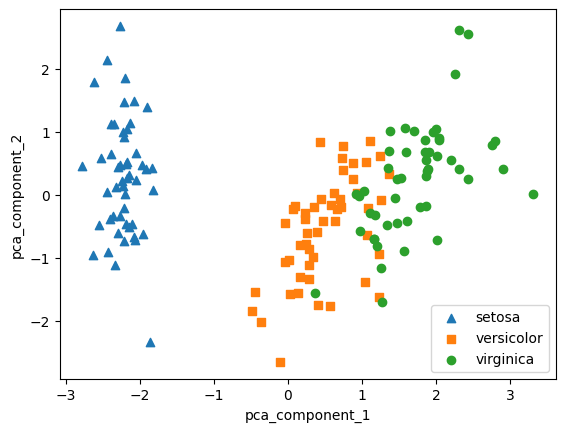

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

Setosa는 여전히 쉽게 구분 가능. 나머지 둘도 아까보단 구분하기 쉬워짐.

In [ ]:
print(pca.explained_variance_ratio_) #variance 비율 확인

[0.72962445 0.22850762]


이제 원본이랑 PCA로 축소한 거에 분류를 적용해보겠음.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


차원 축소한 것의 정확도가 더 후짐. 

* credit card 데이터 세트 PCA 변환

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
userpath='/content/drive/MyDrive/CUAI'

Mounted at /content/drive


In [ ]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel(userpath+'/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


3만개의 레코드와 24개의 속성
* default payment next month: Target 값. 다음달 연체 여부, 연체:1, 정상납부:0

In [ ]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True) # 0 다음에 2라서 0을 1로 바꾸고 디폴트어쩌고는 넘 길어서 줄이겠음.
y_target = df['default'] # 타겟값으로 설정
X_features = df.drop('default', axis=1) # 타겟값 빼고 데이터프레임으로 만들겠음.

In [ ]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

각 속성끼리의 상관도를 구해보겠음. (참고로 상관도가 매우 높다고 함)

<Axes: >

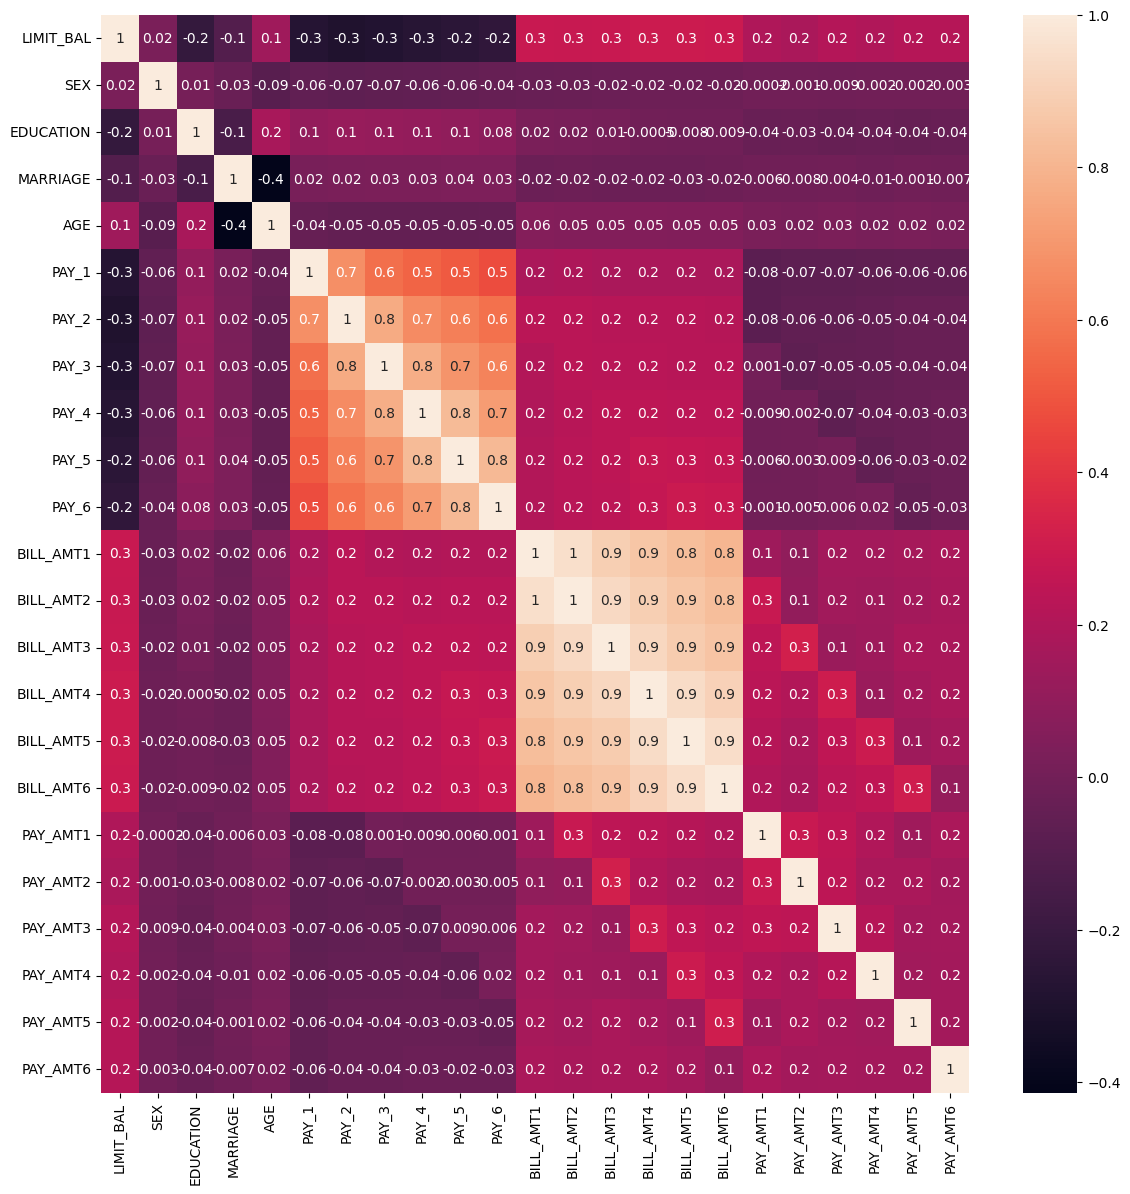

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


BILL_AMT1~BILL_AMT6 이놈들이 대부분 0.9 이상. 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 변동성 수용 가능.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
cols_pay = ['PAY_' + str(i) for i in range(1, 7)]
cols_amt = ['PAY_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)
cols_bill.extend(cols_pay)
cols_bill.extend(cols_amt)
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
PCA Component별 변동성: [0.36180187 0.20618472]


2개의 PCA만으로 6개 속성의 변동성을 95퍼 이상 설명 가능. 특히 첫 번째 축으로 90퍼의 변동성 수용 가능.

이번엔 원본 데이터셋과 6개의 component로 PCA 변환한 데이터셋의 분류 예측 결과를 비교해보겠삼

랜덤포레스트 갈겨주겠음.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8081 0.8197 0.8232]
평균 정확도:0.8170


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7904 0.7971 0.8026]
PCA 변환 데이터 셋 평균 정확도:0.7967


한 1~2퍼정도 저하됐음. 적다곤 못하지만 거의 75퍼센트를 날렸는데도 이정도 성능이면 압축을 잘 했다고 볼 수 있겠지?

차원 축소는 CV에서 활발하게 적용됨.

# 6.3 LDA
## LDA(Linear Discriminant Analysis)-선형 판별 분석법
##### PCA와 유사 - 입력 데이터 세트를 저차원 공간에 두영해 차원을 축소하는 기법
##### 차이 - LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소

##### PCA - 입력데이터의 변동성이 가장 큰 축/LDA - 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축 을 찾는다.

##### LDA는 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소
##### 클래스간의 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게

![nn](1.jpg)

#### LDA를 구하는 스텝
##### 1. 클래스 내부와 클래스 간 분산 행렬을 구함. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 백터를 기반으로 구함.
##### 2. 클래스 내부 분산행렬을 Sw, 클래스 간 분산 행렬을 Sb라고 하면 다음 식으로 두 행렬을 고유백터로 분해할 수 있음.
![nn](2.jpg)
##### 3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출
##### 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환


### 붓꽃 데이터 셋에 LDA 적용하기 
##### 붓꽃 데이터 세트를 사이킷런의 LDA를 이용해 변환하고, 그 결과를 품종별로 시각화

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()#붓꽃 데이터 로드
iris_scaled = StandardScaler().fit_transform(iris.data)#표준 정규분포로 스케일링

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
#LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이므로 클래스의 결정 값이 변환 시에 필요하다.
lda.fit(iris_scaled, iris.target)#fit()메서드를 호출할 때 결정값이 입력됐음에 유의
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


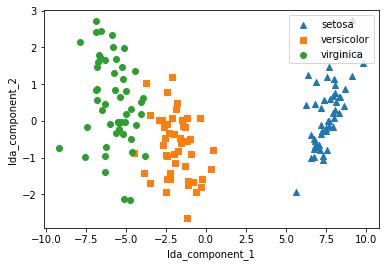

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()


# 6.4 SVD

### SVD 개요
행렬 분해 기법 이용  
SVD는 정방행렬 + 행과 열의 크기가 다른 행렬에도 적용 가능 (PCA는 정방행렬만 가능)  
$$ A=U\sum{V^t} $$  
행렬 U와 V에 속한 벡터는 특이벡터이고 모든 특이 벡터는 서로 직교하는 성질을 가진다. 
시그마는 대각에 위치한 값만 0이 아니고 그 외의 위치의 원소는 다 0인 대각행렬이다.  
SVD의 A의 차원이 mxn일 때 U의 차원이 mxm, 시그마의 차원이 mxn, V^t의 차원이 nxn으로 분해된다,  
하지만 대부분 시그마의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 시그마에 대응되는 U와 V원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다. 컴팩트한 형태로 SVD를 적용하면 A의 차원이 mxn일 때, U의 차원은 mxp, 시그마의 차원은 pxp, V^t의 차원은 pxn으로 분해한다.  
Truncated SVD는 시그마의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 차원을 더 줄인 형태로 분해하는 것

In [2]:
#일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [3]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


시그마 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현한다. 따라서 시그마 행렬의 경우는 1차원 행렬인 (4, )로 반환된다.

In [4]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [5]:
#데이터 세트가 로우 간 의존성이 있는 경우를 가정
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [5]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


차원은 같지만 시그마의 값 중 2개가 0으로 변환. -> 선형 독립인 로우 벡터의 개수가 2개라는 의미 (Rank=2)

In [6]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD 를 이용한 행렬 분해
시그마 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출, 분해  
 1. 인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬을 정확하게 다시 원복 불가
 2. 압축되어 분해됨에도 불구하고 상당한 수준의 원본 행렬 근사 가능

In [7]:
#Truncated SVD는 사이파이에서만 지원, 희소 행렬로만 지원
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

사이킷런의 Truncated SVD클래스는 U,Sigma,Vt 행렬을 반환하지 않는다.  
fit()와 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환한다.  
원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

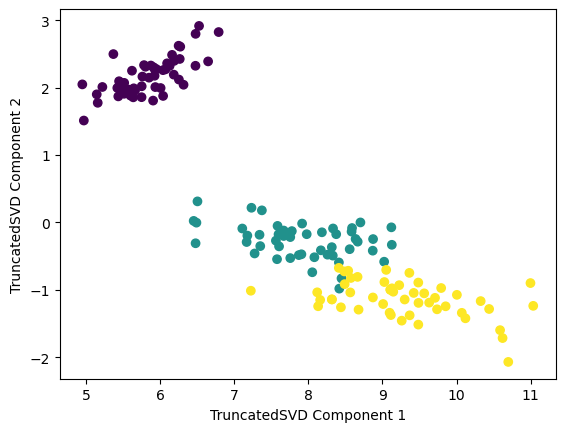

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

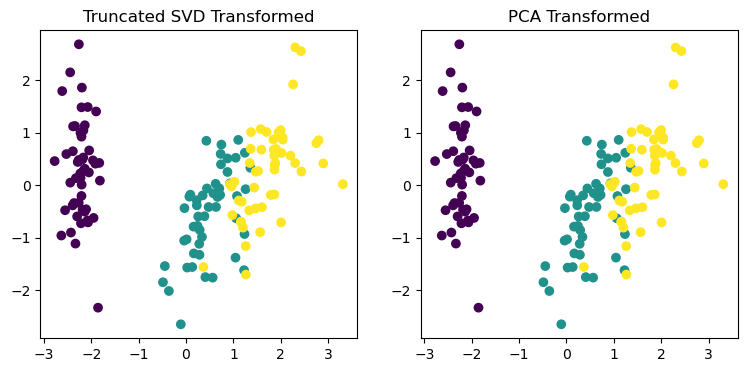

In [10]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [11]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.347323724283257e-15
-2.168404344971009e-18


두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 실제로 서로 비교해 보면 거의 같다.  
-> 즉 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환 수행  
PCA는 밀집 행렬에 대한 변환만 가능/SVD는 희소 행렬에 대한 변화도 가능

# 6.5 NMF

### NMF 
* NMF: Truncated SVD와 같은 낮은 랭크를 통한 행렬 근사 방식의 변형입니다.
* 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 좀 더 간단하게 2개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.

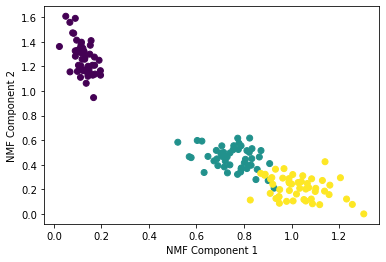

In [16]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()


* NMF: SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됩니다.
* 영화 추천과 같은 추천 영역에도 활발하게 적용된다.

# 6.6 정리
* PCA: 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식입니다. 
* 입력 데이터를 공분산 행렬을 기반으로 고유 벡터를 생성하고 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 방식입니다.
* PCA가 입력 데이터 변동성의 가장 큰 축을 찾는 데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소합니다.
* SVD와 NMF: 매우 많은 피처 데이터를 가진 고차원 행렬을 2개의 저차원 행렬로 분리하는 행렬 분해 기법